# Priprema i vizualizacija podataka
## Wisconsin breast cancer dataset (Diagnostic)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Učitavanje podataka

In [89]:
X = pd.read_csv("data.csv")

In [12]:
X.shape

(569, 33)

Dataset ima 569 instanci i 33 značajke(stupca).

In [13]:
X.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Pojašnjenje značajki:
- diagnosis - informacija je li rak maligan ili benigan 

- radius
- texture
- perimeter
- area
- smoothness - lokalna varijacija u dužinama radijusa
- compactness - (perimeter^2/area-1.0)
- concavity - jačina konkavnih dijelova konture
- concave points - broj konkavnih dijelova konture
- symmetry
- fractal dimension - ("coastline approximation" - 1)

Svaki od navedenih atributa(osim dijagnoze) je tipa float i ima srednju vrijednost(mean), standardnu pogrešku(se) i "najgoru" vrijednost(worst; srednja vrijednost tri najveće vrijednosti te značajke).

In [15]:
X = X.drop("Unnamed: 32", axis=1)

Ovaj stupac možemo izbaciti zato što ne nosi nikakvu informaciju( Non null count = 0).

In [16]:
X.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [18]:
X.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

U ovom skupu podataka nema nedostajućih vrijednosti.

#### Provjera stršećih podataka

In [38]:
X.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Na prvi pogled možemo zaključiti da bi stršeći podaci mogli biti u area_mean i area_worst značajkama.

Provjerimo prvo raspršenje vrijednosti za značajku area_mean

In [48]:
print('area_mean > 300: ', (X.area_mean > 300).sum())
print('area_mean > 500: ', (X.area_mean > 500).sum())
print('area_mean > 600: ', (X.area_mean > 600).sum())
print('area_mean > 800: ', (X.area_mean > 800).sum())
print('area_mean > 1000: ', (X.area_mean > 1000).sum())
print('area_mean > 2000: ', (X.area_mean > 2000).sum())

area_mean > 300:  524
area_mean > 500:  339
area_mean > 600:  234
area_mean > 800:  137
area_mean > 1000:  92
area_mean > 2000:  4


In [57]:
X.loc[X.area_mean > 2000, 'area_mean']

180    2250.0
212    2499.0
352    2010.0
461    2501.0
Name: area_mean, dtype: float64

In [61]:
X.loc[X.area_mean > 1500, 'area_mean']

82     1878.0
108    1509.0
122    1761.0
164    1686.0
180    2250.0
202    1685.0
212    2499.0
236    1670.0
339    1747.0
352    2010.0
368    1546.0
461    2501.0
503    1682.0
521    1841.0
Name: area_mean, dtype: float64

Četiri instance imaju vrijednosti area_mean veće od 2000 no 10ak podataka nalazi se u intervalu [1500, 2000] stoga nećemo te podatke smatrati stršećim vrijednostima.

Ponovimo isto za značajku area_worst

In [49]:
print('area_worst > 300: ', (X.area_worst > 300).sum())
print('area_worst > 500: ', (X.area_worst > 500).sum())
print('area_worst > 800: ', (X.area_worst > 800).sum())
print('area_worst > 1000: ', (X.area_worst > 1000).sum())
print('area_worst > 2000: ', (X.area_worst > 2000).sum())
print('area_worst > 3000: ', (X.area_worst > 3000).sum())
print('area_worst > 4000: ', (X.area_worst > 4000).sum())

area_worst > 300:  552
area_worst > 500:  439
area_worst > 800:  221
area_worst > 1000:  153
area_worst > 2000:  30
area_worst > 3000:  5
area_worst > 4000:  1


In [54]:
X.loc[X.area_worst > 3000, 'area_worst']

180    3216.0
265    3432.0
352    3234.0
368    3143.0
461    4254.0
Name: area_worst, dtype: float64

Samo jedna instanca ima vrijednost značajke area_worst veće od 4000, niti jedna druga vrijednost ne prelazi 3500 stoga ovaj podatak možemo smatrati stršećim podatkom te ga ukloniti.

In [66]:
X.drop(461, axis=0, inplace=True)

In [68]:
#provjera
X.loc[X.area_worst > 4000, 'area_worst']

Series([], Name: area_worst, dtype: float64)

#### Dijagnoza jedina nije numerička značajka stoga ćemo ju enkodirati koristeći LabelEncoder.

In [97]:
X["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [25]:
le = LabelEncoder()
le.fit(X.iloc[:,1])

X.iloc[:,1] = le.transform(X.iloc[:,1])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Vidimo da se sad tip značajke diagnosis promijenio u integer.

In [33]:
X.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Značajka id je jedinstvena za svaku instancu u ovom skupu podataka i ona je monotoni atribut stoga ćemo ju izbaciti iz dataseta.

In [35]:
X = X.drop("id", axis=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Vizualizacija podataka
#### Korelacija značajki i dijagnoze

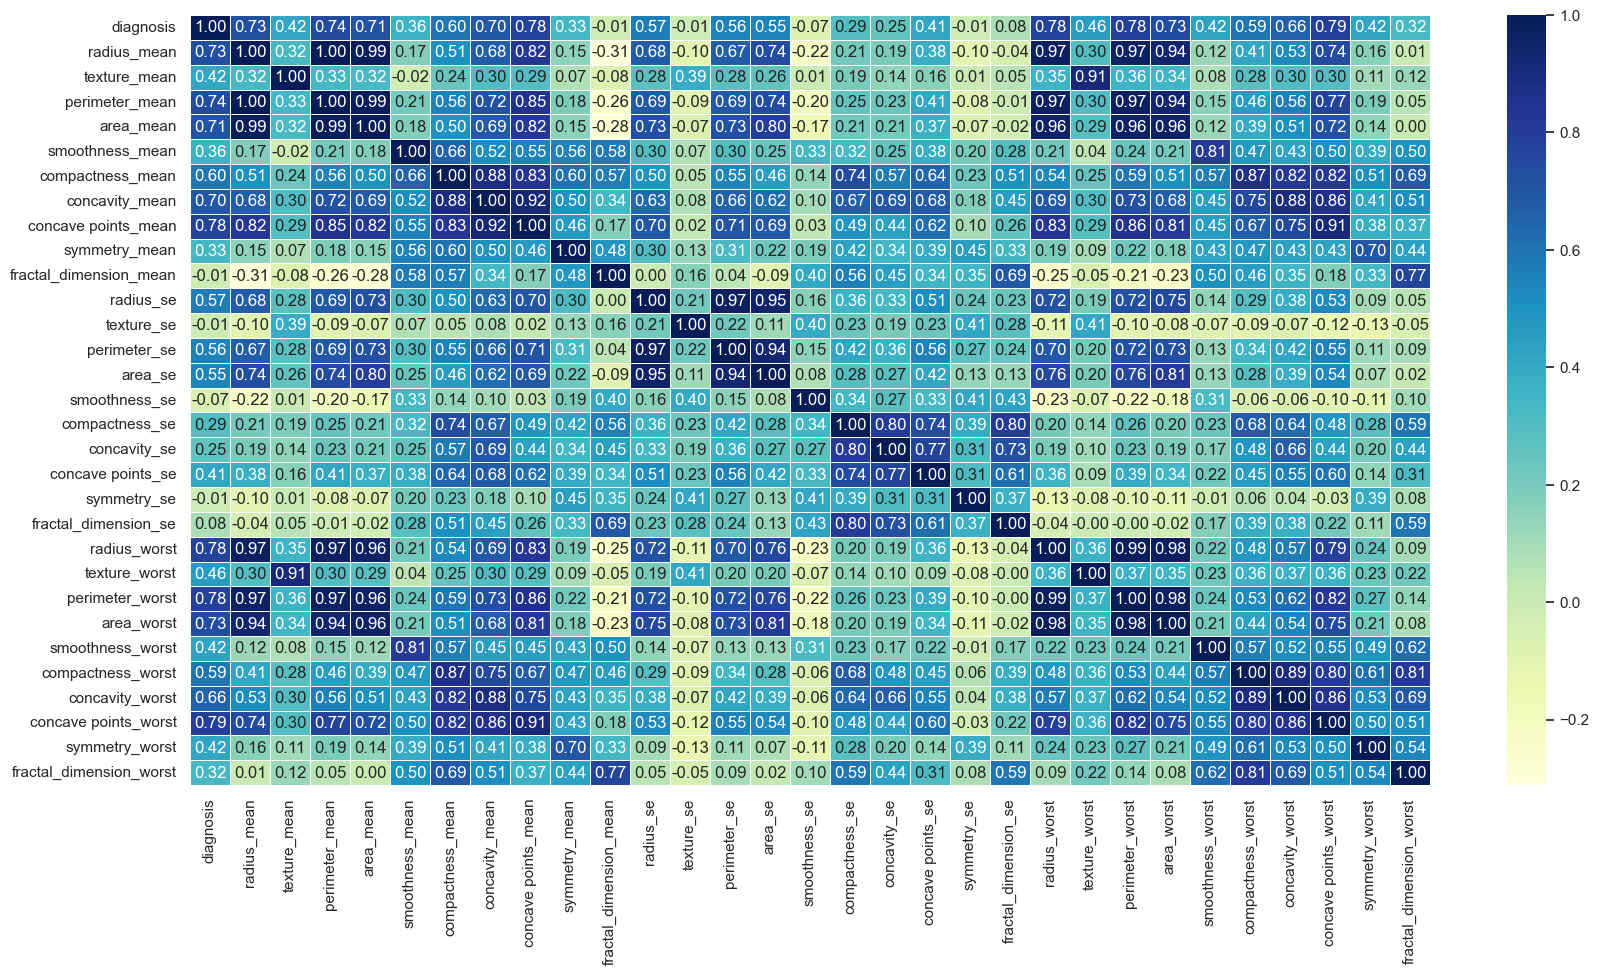

In [45]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Gledamo prvi stupac odnosno korelaciju značajki s dijagnozom. fractal_dimension_mean, texture_se i symmetry_se su jako slabo korelirane s dijagnozom (-0.01). Ove značajke možemo izbaciti jer imaju premalo utjecaja na dijagnosticiranje raka.

In [69]:
X.drop(['fractal_dimension_mean', 'texture_se', 'symmetry_se'], axis=1, inplace=True)

In [74]:
X.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

#### Prikaz količine maligno(1) i benigno(0) dijagnosticiranih instanci u datasetu

<Axes: xlabel='diagnosis', ylabel='count'>

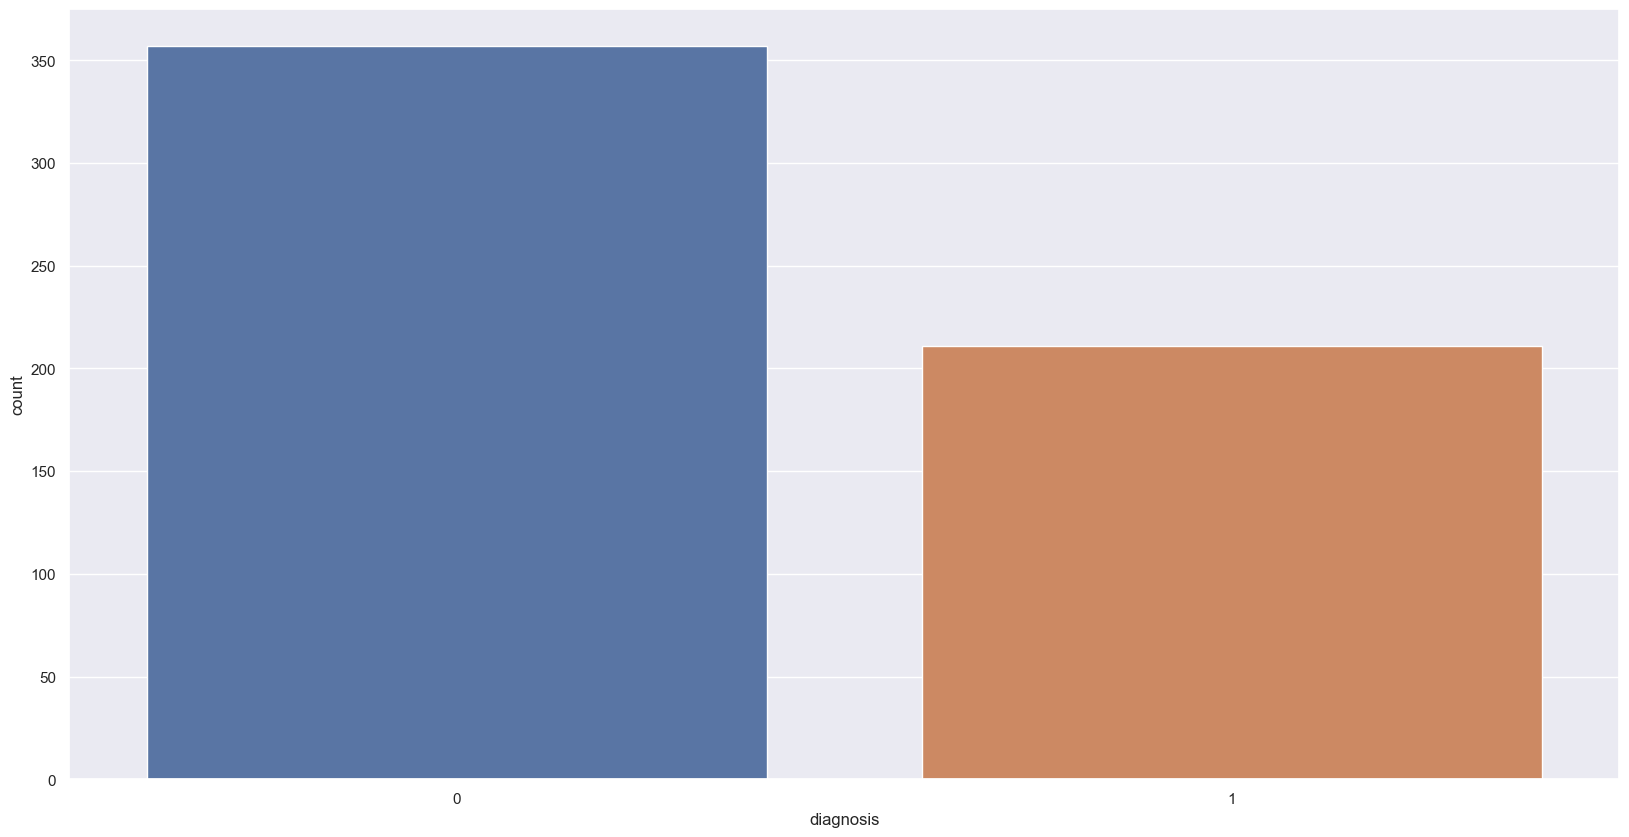

In [76]:
  sns.countplot(X, x="diagnosis")

In [78]:
means = X[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean']]

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

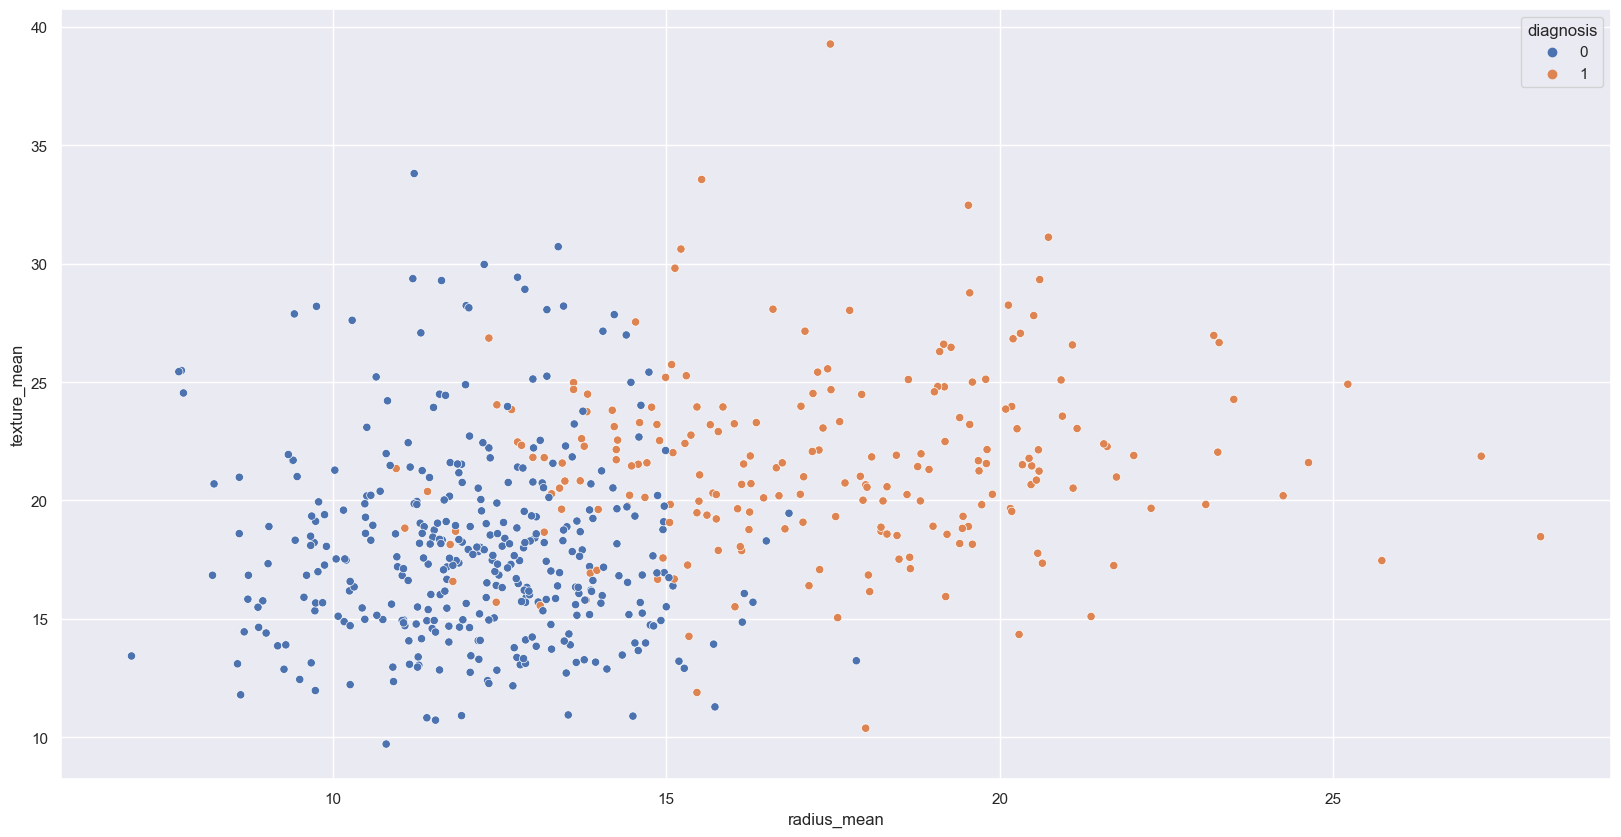

In [83]:
sns.scatterplot(data=means, x="radius_mean", y="texture_mean", hue="diagnosis")

Iz gornjeg prikaza možemo zaključiti da su instance manjeg radijusa i manje teksturirane većinom označene kao benigne, odnosno da su instance većeg radijusa i izraženije teksture dijagnosticirane kao maligne.

#### Countplot srednje vrijednosti radijusa

<Axes: xlabel='radius_mean', ylabel='count'>

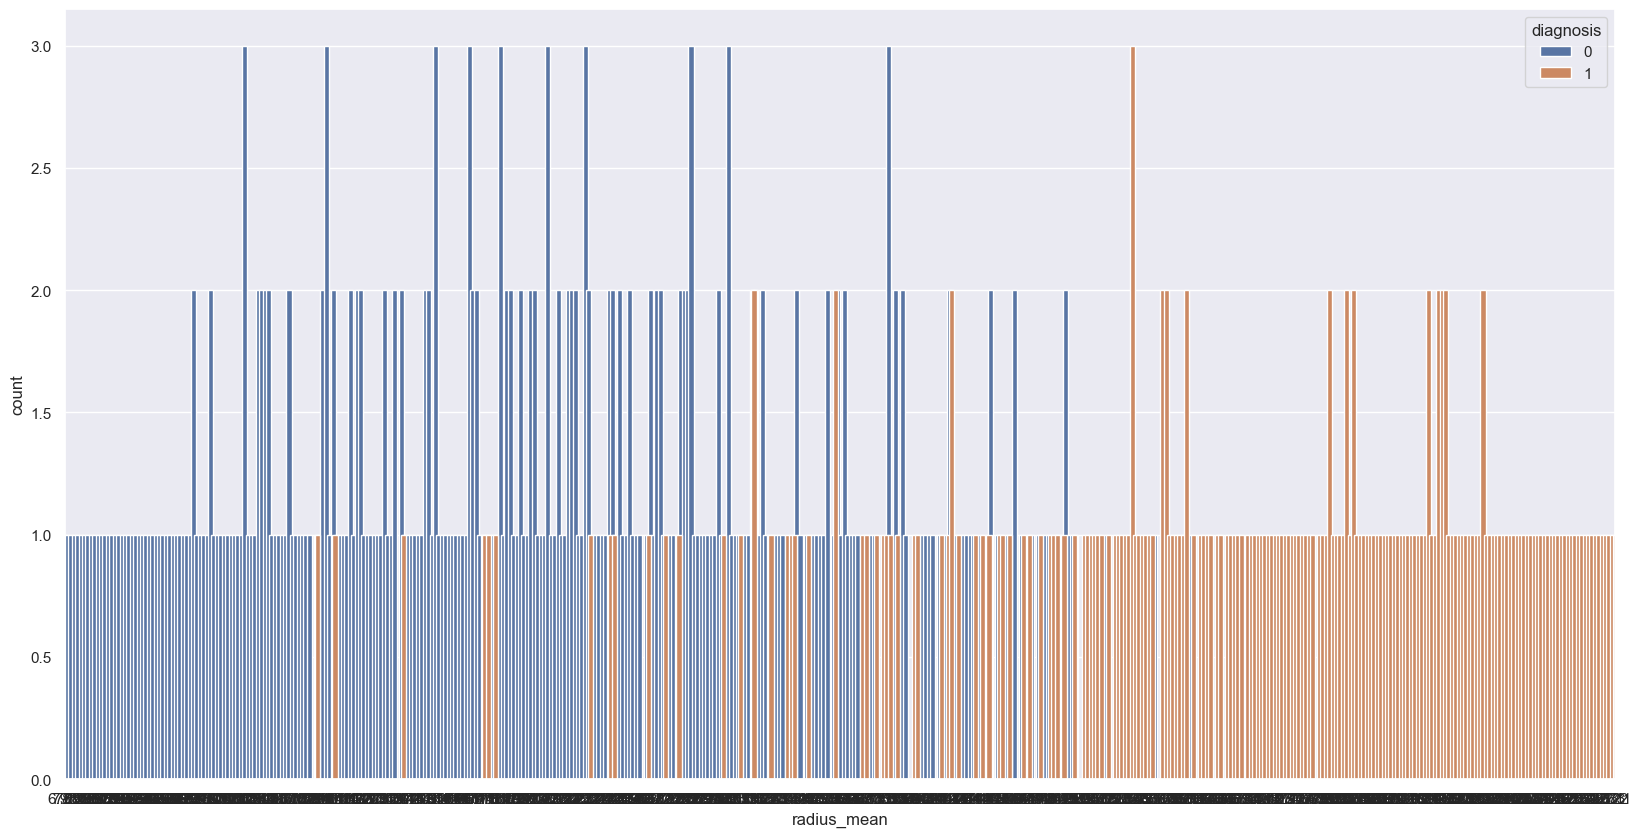

In [88]:
sns.countplot(X, x="radius_mean", hue="diagnosis", width=3)

Iz ovog prikaza možemo zaključiti da maligno dijagnosticirane instance u globalu imaju veći radijus od onih benignih.